## CODE

In [115]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample

In [116]:
df = pd.read_csv('/Users/Merina/Downloads/heart_attack_risk_dataset (1).csv')

In [117]:
df.dropna(how='all');

In [118]:
df.shape

(50000, 9)

In [119]:
df = df.drop(['Chest_Pain_Type', 'ECG_Results'], axis=1, errors='ignore')
df['Gender'] = df['Gender'].map({'Male': 2, 'Female': 1})
df['Stress_Level'] = df['Stress_Level'].map({'Low': 1, 'Moderate': 3, 'High': 3})

## DATA

In [120]:
df.head()

,Age,Gender,BMI,Heart_Rate,Family_History,Stress_Level,Diabetes
0,69,1,34.61,85,0,3,1
1,32,2,22.75,103,0,1,0
2,89,2,35.32,127,0,1,0
3,78,2,18.23,125,0,1,1
4,38,1,19.82,107,0,3,0


In [121]:
df['Diabetes'].value_counts()

Diabetes
0    40058
1     9942
Name: count, dtype: int64

<Axes: xlabel='Diabetes', ylabel='count'>

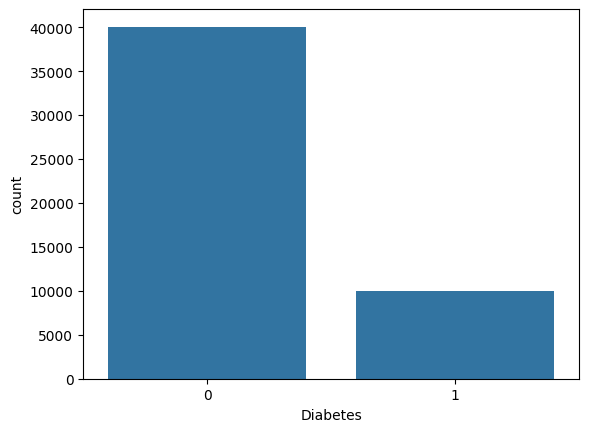

In [122]:
import seaborn as sns
sns.countplot(x='Diabetes', data=df)

## TRAINING

In [123]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,random_state=42,test_size=0.12,stratify=y)

In [126]:
rf = RandomForestClassifier()

In [127]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [128]:
y_pred = rf.predict(X_test)

## confusion matrix

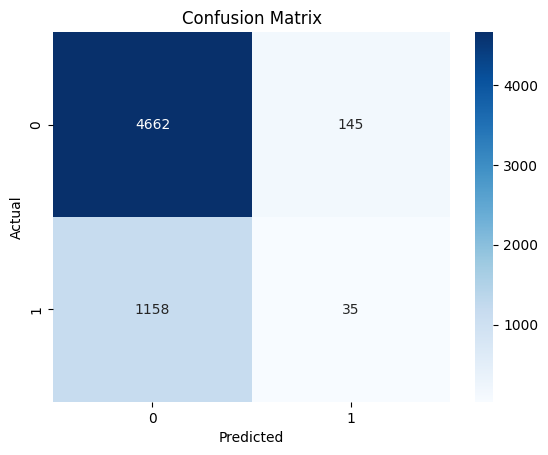

In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ACCURACY

In [130]:
rf.score(X_test,y_test)

0.7828333333333334

# HYPERPARAMETERS

In [131]:
rf2 = RandomForestClassifier(n_estimators = 1000,
                             criterion = 'entropy',
                             min_samples_split = 10,
                             max_depth = 14,
                             random_state = 42
                            )

In [132]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

ACCURACY

In [133]:
rf2.score(X_test, y_test)

0.8011666666666667

Balanced class distribution:
Diabetes
1    40058
0    40058
Name: count, dtype: int64


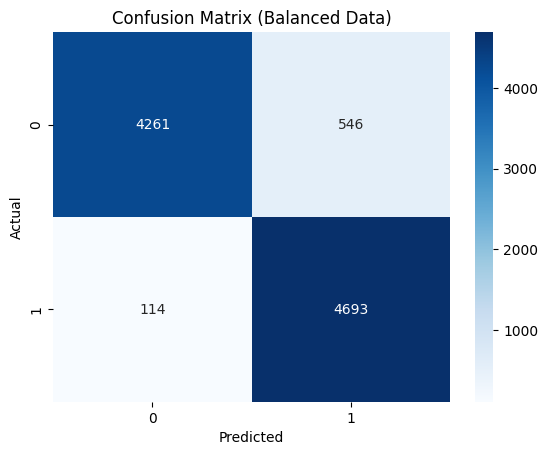

Accuracy (basic RF with balanced data): 0.931350114416476


In [137]:
# Balance the data using upsampling
df_majority = df[df['Diabetes'] == 0]
df_minority = df[df['Diabetes'] == 1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),   # match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
f3 = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
f3 = f3.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print("Balanced class distribution:")
print(f3['Diabetes'].value_counts())

# Training with balanced data
X = f3.drop('Diabetes', axis=1)
y = f3['Diabetes']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.12, stratify=y)

# Random Forest Model (basic)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Balanced Data)')
plt.show()

# Accuracy
print("Accuracy (basic RF with balanced data):", rf.score(X_test, y_test))


In [138]:
import joblib

joblib.dump(rf, 'diabetes_model.joblib')


['diabetes_model.joblib']

In [139]:
import os
os.getcwd()


'C:\\Users\\Merina'